In [1]:
import pandas as pd

df1 = pd.read_parquet('./../data/dataset_size_info.parquet')
df2 = pd.read_parquet('./../data/aod_data_history.parquet')

df = df1[(df1['tier'] == 'AODSIM') &
         (df1['d_dataset'].isin(set(df2['dataset_name'])))]


In [2]:
from cmSim import utils

mcm_data = utils.get_mcm_data('./../data/aodsim_mcm_data.json')
df['pwg'] = df['d_dataset'].apply(
    utils.get_pwg_from_dataset, mcm_data=mcm_data)

df.head(None)


Unzipping and loading json file... Done


C:\Users\simon\AppData\Local\Temp/ipykernel_17996/3238414843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pwg'] = df['d_dataset'].apply(


,d_dataset,dsize,nfiles,devts,tier,pwg
761,/MinBias_TuneZ2star_Castor_7TeV_pythia6/Summer...,3.397343e+10,12,500000,AODSIM,None
926,/EtabToJpsiJpsi_8TeV-pythia6-evtgen/Summer12_D...,1.495868e+11,46,499741,AODSIM,None
948,/TTH_HToGG_M-140_8TeV-pythia6/Summer12_DR53X-P...,3.682396e+10,16,100206,AODSIM,None
974,/GluGluToHToWWToLAndTau2NuQQ_M-550_8TeV-minloH...,1.477186e+11,48,397947,AODSIM,HIG
998,/DYToEE_M-20_CT10_TuneZ2star_v2_8TeV-powheg-py...,1.103235e+12,383,3960446,AODSIM,HIG
...,...,...,...,...,...,...
1270478,/ggH_HToSSTo4l_MH-150_MS-20_ctauS-1_TuneCP5_13...,1.610581e+10,5,40000,AODSIM,EXO
1270492,/ggH_HToSSTo4l_MH-500_MS-150_ctauS-1000_TuneCP...,1.800394e+10,8,40000,AODSIM,EXO
1270493,/ggH_HToSSTo4l_MH-110_MS-20_ctauS-1000000_Tune...,1.606148e+10,6,40000,AODSIM,EXO
1270494,/ggH_HToSSTo4l_MH-900_MS-150_ctauS-100_TuneCP5...,1.716225e+10,7,40000,AODSIM,EXO


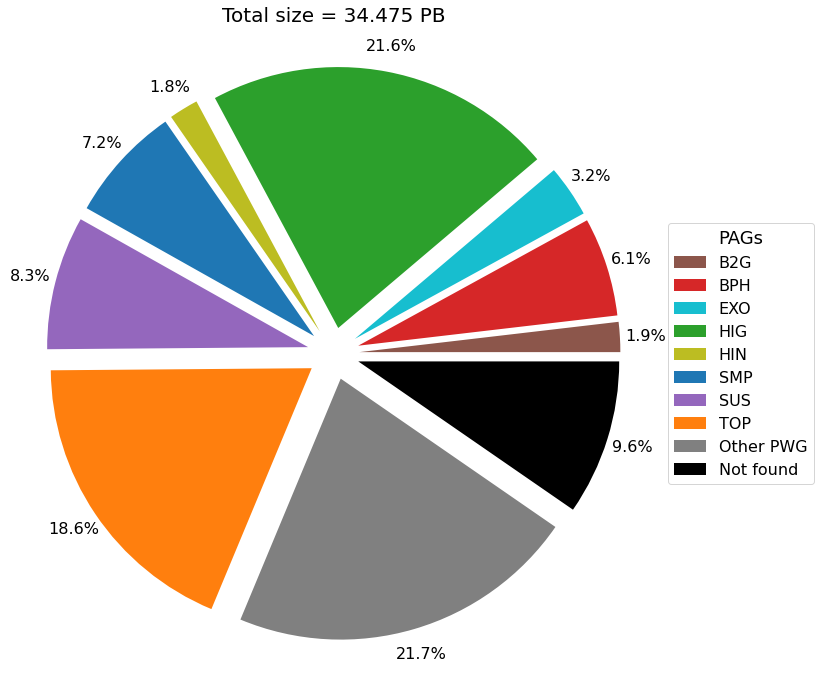

In [3]:
import pylab as plt
from cmSim.tools import plotting

fig, ax = plt.subplots(figsize=(12, 12))

pags = utils.get_pags()
plotting.plot_piechart_by_pag(ax, df=df, pags=pags)
